<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
"""
Make blobs of data for classification
"""

# set seed for reproducibility
np.random.seed(42)

# make 2D, 2 category dataset
from sklearn.datasets import make_blobs
n_samples, n_features = 200, 2
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=2, cluster_std=2.5)

# generate df to inspect structure easily
df = pd.DataFrame(dict(xx=X[:,0], yy=X[:,1], label=y))
df.head()

,xx,yy,label
0,0.653810,0.474732,1
1,5.446675,-0.094908,1
2,4.701154,3.218165,1
3,-5.164957,10.198267,0
4,5.342359,0.416421,1


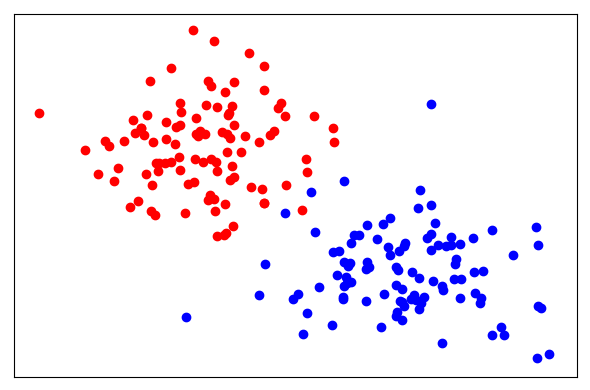

In [3]:
"""
Generate scatter plot
"""

def scatter_multilabel(X, y, colors:dict={0:'red', 1:'blue'}, savename:str=None):
    """
    Generate scatter plot of multi-labeled data
    
    Args:
        X:        np.array with data
        y:        np.array with labels
        colors:   dict where (key: val) == (label: color)
        savename: if given, save file to name (e.g. 'plot.png') [default: None]

    """
    
    # set color palette
    if not colors: 
        colors = {0:'red', 1:'blue'}

    # plot
    fig = plt.figure(dpi=100)
    for i in colors:
        plt.scatter(
                    X[y==i, 0], 
                    X[y==i, 1], 
                    color=colors[i], 
                    label=colors[i]
                   )
    plt.xticks([])
    plt.yticks([])
    if savename:
        plt.tight_layout()
        plt.savefig(savename)
    plt.show()

# generate plot
scatter_multilabel(X, y, savename='cluster.png')

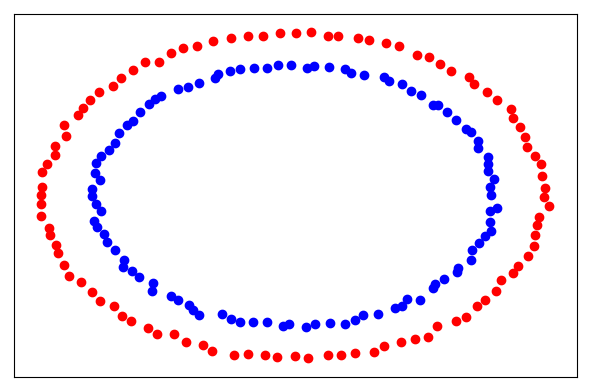

In [4]:
"""
Make concentric circles for more complex classification
"""
from sklearn.datasets import make_circles

X_c, y_c = make_circles(n_samples=n_samples, factor=.8, noise=.01)
scatter_multilabel(X_c, y_c, savename='circles.png')

In [5]:
"""
Train classifier and visualize decision boundary
"""

def create_mesh(matrix_2D, bound=.1, step=.05):
    """
    create_mesh will generate a mesh grid for a given matrix
    
    matrix_2D: input matrix (numpy)
    bound:     boundary around matrix (absolute value)
    step:      step size between each point in the mesh
    """

    # set bound as % of average of ranges for x and y
    bound = bound*np.average(np.ptp(matrix_2D, axis=0))
    
    # set step size as % of the average of ranges for x and y 
    step = step*np.average(np.ptp(matrix_2D, axis=0))

    # get boundaries
    x_min = matrix_2D[:,0].min() - bound
    x_max = matrix_2D[:,0].max() + bound
    y_min = matrix_2D[:,1].min() - bound 
    y_max = matrix_2D[:,1].max() + bound
    
    # create and return mesh
    mesh = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return mesh


def predict_mesh(trained_clf, mesh):
    """
    predict_mesh will generate predictions for all points in a mesh grid
    
    clf:    sklearn classifier (e.g. knn)
    mesh:   tuple returned by create mesh (xx, yy)
    """
    
    # make predictions based on all values in mesh and return
    predictions = trained_clf.predict(np.c_[mesh[0].ravel(), mesh[1].ravel()])
    predictions = predictions.reshape(mesh[0].shape)    
    return predictions


def decision_boundary_plot(clf, X, y, colors:dict={0:'red', 1:'blue'}, savename:str=None):
    """
    Plot data with a decision boundary
    
    Args:
        clf:      trained sklearn classifier
        X:        np.array with data
        y:        np.array with labels
        colors:   dict where (key: val) == (label: color)
        savename: if given, save file to name (e.g. 'plot.png') [default: None]
    """
    
    # create mesh from data
    mesh = create_mesh(X)
    
    # get predictions from data
    mesh_predictions = predict_mesh(clf, mesh)

    # plot the contour plot
    plt.figure(dpi=100)
    plt.contourf(mesh[0], mesh[1], mesh_predictions, alpha=0.2, cmap='Spectral')
    for i in colors:
        plt.scatter(
                    X[y==i, 0], 
                    X[y==i, 1], 
                    color=colors[i], 
                    label=colors[i],
                   )
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Decision Boundary for {str(clf.__class__()).split("(")[0]}')
    if savename:
        plt.tight_layout()
        plt.savefig(savename)
    plt.show()

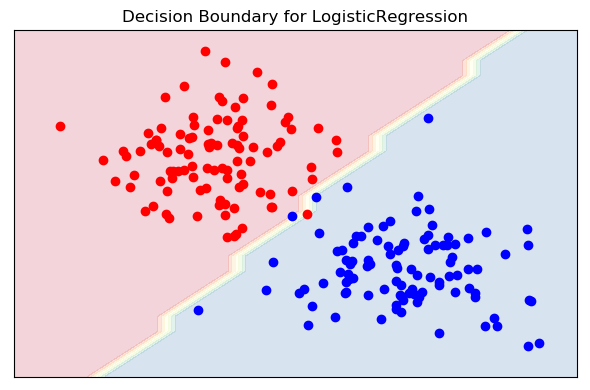

In [6]:
# train logistic regression and plot
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='lbfgs')
clf.fit(X, y)    
decision_boundary_plot(clf, X, y, savename='clusters_lr.png')

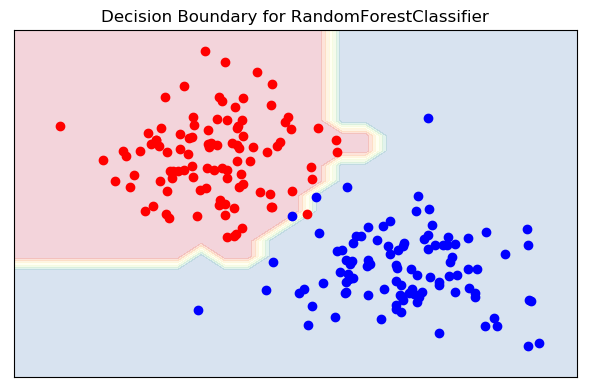

In [7]:
# train random forest and plot
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=5000)
clf.fit(X, y)    
decision_boundary_plot(clf, X, y, savename='clusters_rf.png')

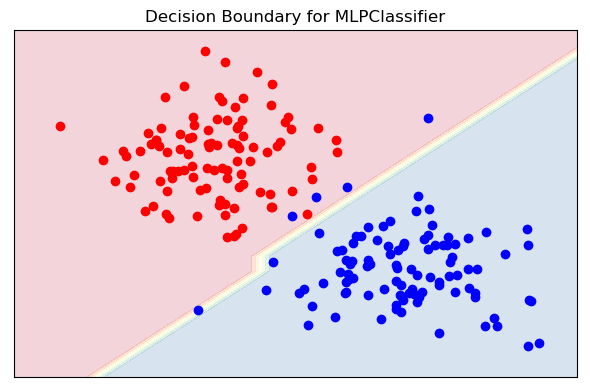

In [8]:
# train neural network and plot
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42, 
                    hidden_layer_sizes=(1), 
                    activation='relu', 
                    max_iter=5000)
clf.fit(X, y)    
decision_boundary_plot(clf, X, y, savename='clusters_mlp_1.png')

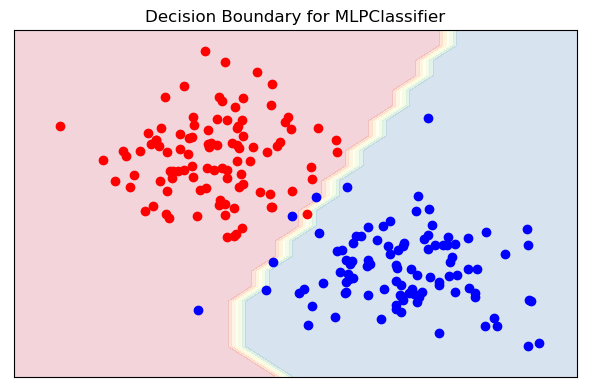

In [9]:
# train neural network and plot
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42, 
                    hidden_layer_sizes=(4), 
                    activation='relu', 
                    max_iter=1000)
clf.fit(X, y)    
decision_boundary_plot(clf, X, y, savename='clusters_mlp_16.png')

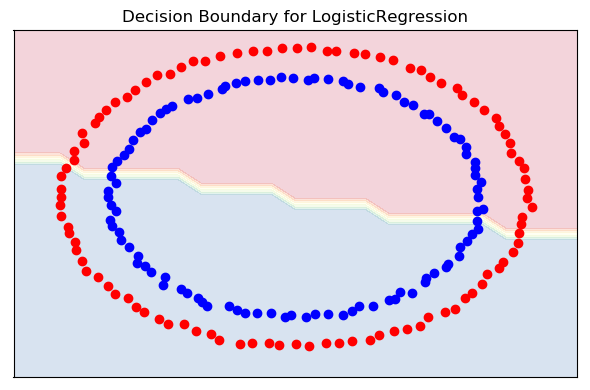

In [10]:
# train logistic regression on circles and plot
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='lbfgs')
clf.fit(X_c, y_c)
decision_boundary_plot(clf, X_c, y_c, savename='circles_lr.png')

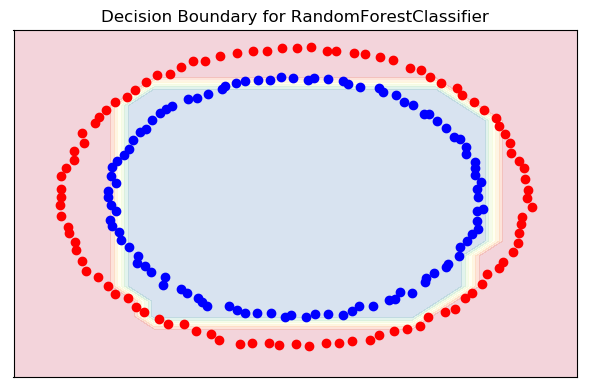

In [11]:
# train random forest on circles and plot
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=5000)
clf.fit(X_c, y_c)    
decision_boundary_plot(clf, X_c, y_c, savename='circles_rf.png')

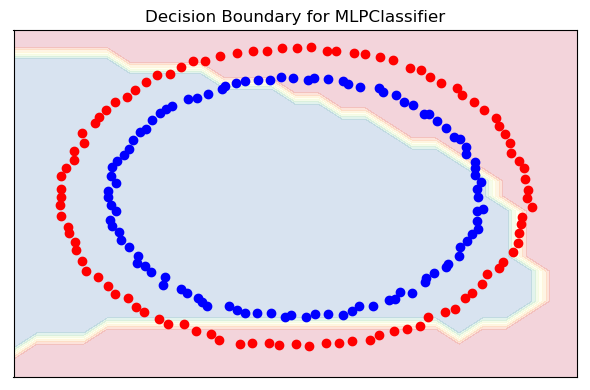

In [12]:
# train neural network on circles and plot
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42, 
                    hidden_layer_sizes=(6,6), 
                    activation='tanh', 
                    max_iter=5000)
clf.fit(X_c, y_c)
decision_boundary_plot(clf, X_c, y_c, savename='circles_mlp_6_6.png')

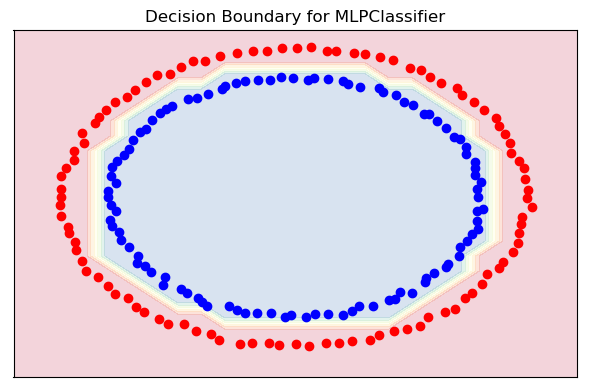

In [13]:
# train neural network and plot
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42, 
                    hidden_layer_sizes=(6,6,6), 
                    activation='tanh', 
                    max_iter=5000)
clf.fit(X_c, y_c)    
decision_boundary_plot(clf, X_c, y_c, savename='circles_mlp_6_6_6.png')